In [1]:
# Import các thư viện
import os
import pandas as pd
import numpy as np
from keras import Model
from keras.src.saving import load_model
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

2024-12-04 07:28:02.717750: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nguyendinhkhai/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Đường dẫn dữ liệu và mô hình
split_dir = "../data/old_data/splits"
model_dir = "../models"
svm_model_path = f"{model_dir}/svm_model.pkl"
plot_dir = "../plots"

In [3]:
# Đọc dữ liệu
X_train = pd.read_csv(f"{split_dir}/X_train.csv")
y_train = pd.read_csv(f"{split_dir}/y_train.csv")
X_test = pd.read_csv(f"{split_dir}/X_test.csv")
y_test = pd.read_csv(f"{split_dir}/y_test.csv")

# Kiểm tra dữ liệu
print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")


Kích thước tập train: (742826, 8)
Kích thước tập test: (93791, 8)


In [4]:
# Tải mô hình ANN đã huấn luyện
ann_model = load_model(f"{model_dir}/ann_model.keras")

# Xem kiến trúc mô hình đã tải
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [5]:
# Trích xuất đặc trưng
X_train_features = ann_model.predict(X_train)
X_test_features = ann_model.predict(X_test)

print(f"Kích thước đặc trưng tập train: {X_train_features.shape}")
print(f"Kích thước đặc trưng tập test: {X_test_features.shape}")


23214/23214 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 3s 997us/step
Kích thước đặc trưng tập train: (742826, 1)
Kích thước đặc trưng tập test: (93791, 1)


In [6]:
# Tải mô hình SVM đã huấn luyện
svm_model = joblib.load(svm_model_path)

Confusion Matrix:
 [[92730   123]
 [    0   938]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     92853
           1       0.88      1.00      0.94       938

    accuracy                           1.00     93791
   macro avg       0.94      1.00      0.97     93791
weighted avg       1.00      1.00      1.00     93791



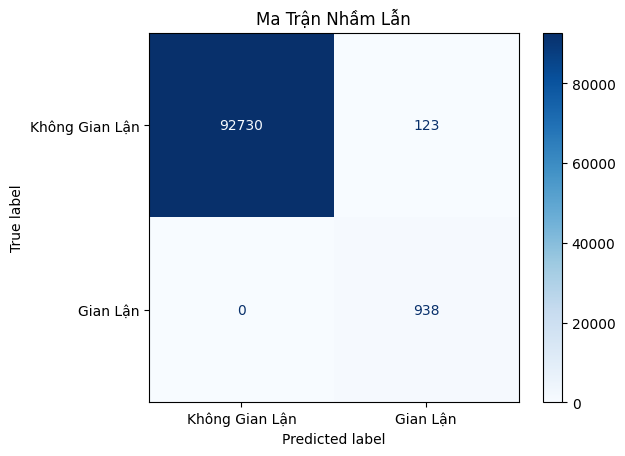

In [7]:
# Dự đoán trên tập test
y_test_pred = svm_model.predict(X_test_features)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Báo cáo chi tiết
print("Classification Report:\n", classification_report(y_test, y_test_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Không Gian Lận", "Gian Lận"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Ma Trận Nhầm Lẫn")
plt.savefig(os.path.join(f"{plot_dir}/evaluation", "confusion_matrix.png"))
plt.show()

